In [6]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import torch
import os

import wandb # TODO: use this..

from utils.data_loading import TwoFolders
from torch.utils.data import DataLoader, random_split


from nets.nets import GenericNC, BasicMLP, BasicCNN
from nets.unet import UNet
from nets.resnet import ResNetBase
from utils.utils import load_images_from_directory, plot_images

In [7]:
args = dict(
        batch=10, 
        dir_img = 'data/samples/img/',
        dir_mask = 'data/samples/tex/',
        out_type = 'tex',
        grayscale=False,
        
        gpu=0,
        iters=1000, 
        trials=3, 
        method='exact',
        mat_type='general',
        loss_on='second_smallest',
        net='cnn',
        size = (96,96),
        width = 50,
        laplace = None,
        lr=1e-3,
        seed = 0,
        img_scale =1,
        val_percent=0.1
    )

experiment = wandb.init(project='DDN-NC', config=args, mode='disabled', allow_val_change=True)
    # disabled and allow val changes... otherwise enable and use sweep to set different params
args = wandb.config

In [8]:
X_input = load_images_from_directory(args.dir_img, num=args.batch, size=args.size, gray=args.grayscale)
Q_true_col = load_images_from_directory('data/samples/col/', num=args.batch, size=args.size, gray=True)
Q_true_tex = load_images_from_directory('data/samples/tex/', num=args.batch, size=args.size, gray=True)

dataset = TwoFolders(args.dir_img, args.dir_mask)#, args.out_type)
# 2. Split into train / validation partitions
n_val = int(len(dataset) * args.val_percent)
n_train = len(dataset) - n_val
train_set, val_set = random_split(dataset, [n_train, n_val], generator=torch.Generator().manual_seed(args.seed))

# 3. Create data loaders
loader_args = dict(batch_size=args.batch, num_workers=os.cpu_count()-2, pin_memory=True)
train_loader = DataLoader(train_set, shuffle=False, **loader_args)
val_loader = DataLoader(val_set, shuffle=False, drop_last=True, **loader_args)

print(f'{X_input.shape} {Q_true_col.shape}')

torch.Size([10, 3, 96, 96]) torch.Size([10, 96, 96])


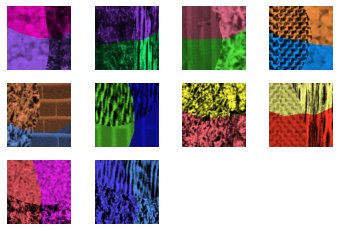

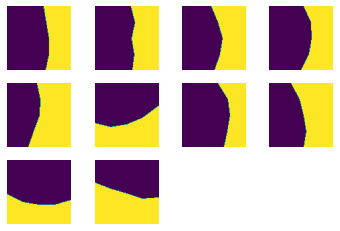

In [9]:
for images, true_masks in train_loader:
    plot_images(images)
    plot_images(true_masks)
    break

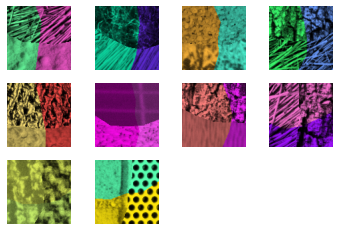

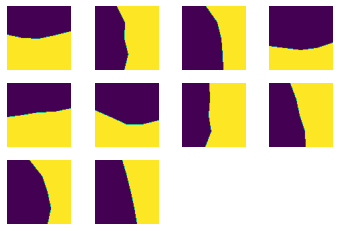

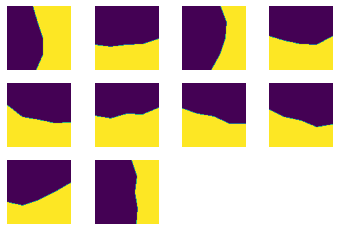

In [10]:
plot_images(X_input[:12].permute(0,2,3,1))
plot_images(Q_true_col[:12])
plot_images(Q_true_tex[:12])